## Passeio aleatório

![walk](https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/numberline_hops.gif)

Seja $d$ a distância percorrida. Sabemos $d = a_1 + a_2 + a_3 + ... + a_N$.

Seja, $<d>$ a média de $d$ repetindo o passeio várias vezes:

$<d> = <a_1 + a_2 + a_3 + ... + a_N> = <a_1> + <a_2> + <a_3> + ... + <a_N> = 0$

Esperado!!

Vamos calcular a média de $d^2$:

$<d^2> = <(a_1 + a_2 + a_3 + ... + a_N)^2>$

$<d^2> = (<a_1^2> + <a_2^2> + <a_3^2> + ... + <a_N^2>) + 2(<a_1a_2> + <a_1a_3> + ... + <a_1a_N> + <a_2a_N> + ...)$

O termo $<a_i^2>$ é igual a 1, já que os valores possíveis são $1$ ou $-1$.

Os termos cruzados $<a_i a_j>$ podem assumir valores $1$ ou $-1$ também, sendo os possíveis pares $(1,1), (1,-1), (-1,1), (-1,-1)$. Notem que há dois pares que se multiplicam a $1$ e dois, a $-1$. Logo, esperamos que a média desses termos seja nula. Logo,

$<d^2> = (1 + 1 + 1 + ... + 1) + 2(0 + 0 + ... + 0 + 0 + ...) = N$.

Legal! Em média, o quadrado da distânica percorrida pelo "passeio" é o número de passos. Calculando a raiz desse termo, podemos pensar na distância média percorrida após $N$ passos (**raiz quadrática média**).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(28)

# Passeio aleatório em 1D

# Definir posição inicial
x = 0

# Número de passos
N = 100

# Loop para dar N passos
for i in np.arange(N):
    r = np.random.rand()   # Gera número aleatório [0,1)
    
    # Passo à direita
    if r < 0.5:
        x += 1
    # Passo à esquerda
    else:
        x -= 1

# Onde o passeio terminou
print(x)

-12


In [15]:
# Array que guarde as posições finais após 100 passos
np.random.seed(42)
x_final = np.array([])

N=100
N_passeios = 10000

# Loop para os passeios
for i in np.arange(N_passeios):
    x = 0
    
    for i in np.arange(N):
        r = np.random.rand()
        
        if r < 0.5:
            x+=1
        else:
            x-=1
            
    # Salvar a posição final em x_final
    x_final = np.append(x_final, x)
    
# Mostrar o valor médio da posição final
print(x_final.mean())

-0.1034


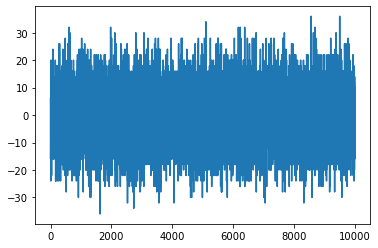

In [16]:
# Visualizar as posições finais
plt.plot(x_final)
plt.show()

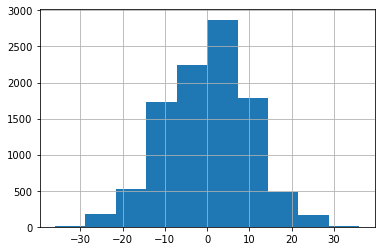

In [18]:
# Distribuição
## Histograma
plt.hist(x_final)
plt.grid()
plt.show()

In [19]:
# Funcional
# Definir função para dar N passos

def passos(N):
    x = 0
    for i in np.arange(N):
        r = np.random.rand()
        
        if r < 0.5:
            x+= 1
        else:
            x-= 1
    return x

def plot_hist(x):
    plt.hist(x, color = 'g', alpha=0.5, ec='k')
    plt.xlabel('Posição final')
    plt.ylabel('Contagem')
    
    plt.axvline(x.mean(), color = 'r', linestyle='dashed', linewidth=4)
    
    plt.show()
    
def plot_linha(x, N_passeios):
    plt.scatter(x, np.ones(int(N_passeios)), s=0.5)
    plt.xlabel('Posição')
    plt.show()

In [22]:
# Tudo de novo de modo funcional
np.random.seed(42)

N = 1e3

N_passeios = 1e3

x_final = np.array([])

# Loop para todos os passeios
for i in np.arange(N_passeios):
    x_final = np.append(x_final, passos(N))

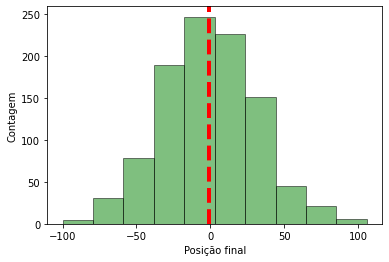

In [23]:
# Distribuição
plot_hist(x_final)

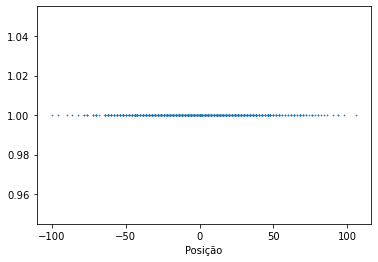

In [24]:
plot_linha(x_final, N_passeios)

In [25]:
# Função Gaussiana de média zero
def gauss(x, d):
    return ( 1/(d*np.sqrt(2*np.pi)) ) * np.exp(-0.5*(x**2/d**2))

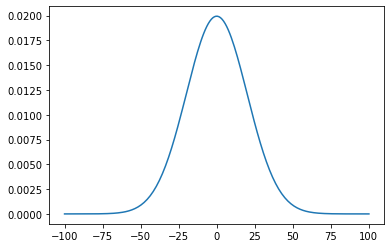

In [30]:
xx = np.linspace(-100,100,200)
plt.plot(xx, gauss(xx, 20))
plt.show()

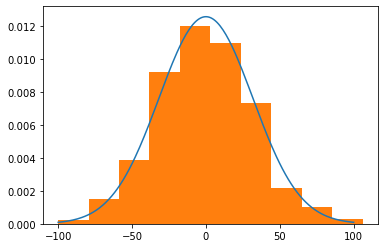

In [31]:
plt.plot(xx, gauss(xx, x_final.std()))
plt.hist(x_final, density=True)
plt.show()

In [32]:
# Note
print(x_final.std())
print(np.sqrt(N))

31.79771759104732
31.622776601683793


## Em 2D

![img](https://4.bp.blogspot.com/-KTzOYHGnqj8/V3TzIrbpuSI/AAAAAAAAINo/Ae5AYImrdZotIcqjk-LG2-Wid3QNokv8ACLcB/s1600/Sistema%2Bde%2Bcoordenadas%2Bpolares.png)

In [44]:
# Função para dar N passos aleatórios em 2D
def passos_2D(N, plota = True):
    # Iniciar na origem
    X = 0.0
    Y = 0.0
    
    x_passeio = np.array([X])
    y_passeio = np.array([Y])
    
    for i in np.arange(N):
        ang = np.random.rand()*2*np.pi
        
        X += np.cos(ang)
        Y += np.sin(ang)
        
        x_passeio = np.append(x_passeio, X)
        y_passeio = np.append(y_passeio, Y)
        

    if plota == True:
        plt.plot(x_passeio, y_passeio, lw = 0.3, color='r')
        plt.show()
    
    return X, Y

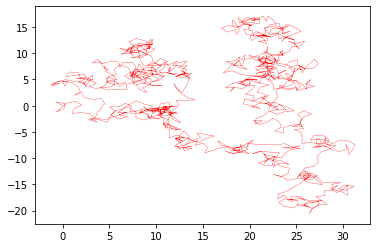

In [40]:
np.random.seed(42)

N = 1000

X, Y = passos_2D(N)

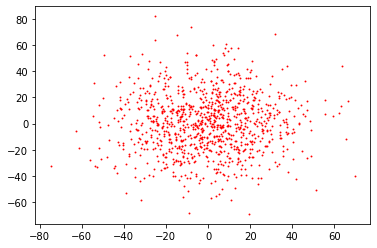

CPU times: user 13.8 s, sys: 75.9 ms, total: 13.8 s
Wall time: 13.8 s


In [45]:
%%time

N=1e3
N_passeios = 1e3

X_final = np.array([])
Y_final = np.array([])

# Loop para diferentes passeios
for i in np.arange(N_passeios):
    X, Y = passos_2D(N, plota = False)
    X_final = np.append(X_final, X)
    Y_final = np.append(Y_final, Y)
    
plt.scatter(X_final, Y_final, s=0.8, c='r')
plt.show()

(array([  3.,  15.,  65., 156., 220., 255., 180.,  78.,  19.,   9.]),
 array([-74.80482863, -60.35118524, -45.89754185, -31.44389846,
        -16.99025507,  -2.53661168,  11.91703172,  26.37067511,
         40.8243185 ,  55.27796189,  69.73160528]),
 <BarContainer object of 10 artists>)

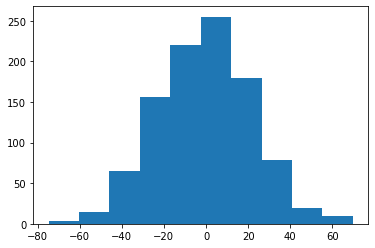

In [46]:
plt.hist(X_final)

(array([  7.,  37., 100., 200., 261., 223., 113.,  40.,  15.,   4.]),
 array([-68.89406364, -53.81999604, -38.74592845, -23.67186086,
         -8.59779326,   6.47627433,  21.55034193,  36.62440952,
         51.69847712,  66.77254471,  81.8466123 ]),
 <BarContainer object of 10 artists>)

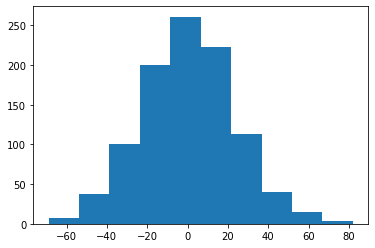

In [47]:
plt.hist(Y_final)

In [ ]:
# Função hist2d!